In [1]:
using KomaMRI, Plots, Unitful, MAT

seq = read_seq("mpf_001_new_short.seq")

function simulate_slice_profile_x(
    seq::Sequence; x=range(-2.e-2, 2.e-2, 200), sim_params=Dict{String,Any}("Δt_rf" => 1e-6)
)
    sim_params["return_type"] = "state"
    sys = Scanner()
    obj = Phantom{Float64}(; x=Array(x), z=zeros(size(x)))
    mag = simulate(obj, seq, sys; sim_params)
    return mag
end

┌ Info: Loading sequence mpf_001_new_short.seq ...
└ @ KomaMRIFiles C:\Users\lucya\.julia\packages\KomaMRIFiles\Xc9Fh\src\Sequence\Pulseq.jl:339


simulate_slice_profile_x (generic function with 1 method)

In [14]:
begin
    fa_degrees = Float64[]
    rf_indices = Int[]

    x = -0.01:0.0001:0.01
    Δx = x[2] - x[1]
    slice_thickness = 5e-3

    start_index = 3
    step_size = 2
    num_pulses = 1000

    for k in 0:num_pulses-1
        i = start_index + k * step_size  

        rf_event = seq[i]
        M = simulate_slice_profile_x(rf_event; x=x)
        Mxy = M.xy

        integral_Mxy = sum(Mxy) * Δx
        magnitude_integral = abs(integral_Mxy)

        α_rad = asin(clamp(magnitude_integral / slice_thickness, -1.0, 1.0))
        α_deg = α_rad * 180 / π

        push!(fa_degrees, α_deg)
        push!(rf_indices, i)
    end
end




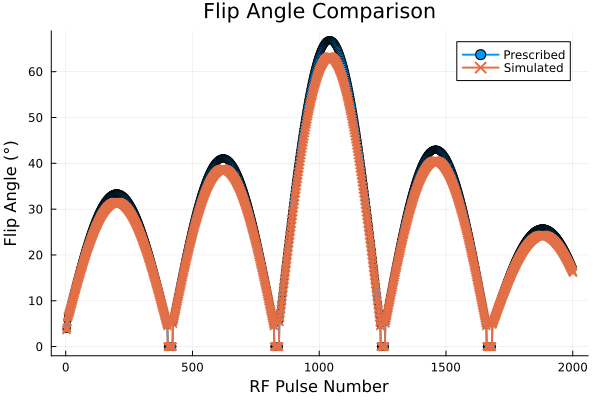

1000

In [15]:
N = length(fa_degrees)

p = plot(rf_indices, prescribed_fas[1:N],
         label="Prescribed", marker=:circle, lw=2)
plot!(p, rf_indices, fa_degrees,
      label="Simulated", marker=:x, lw=2)

xlabel!("RF Pulse Number")
ylabel!("Flip Angle (°)")
title!("Flip Angle Comparison")

display(p)

@show length(fa_degrees)
#@show length(prescribed_fas)
